In [2]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    try:
        value=sy.symbols('{0:.3f}'.format(r)+unidade)
    except:
        #print("symbolic")
        value=r
    display(pd.DataFrame([cell_vars()]).round(2).transpose())
    print('A resposta final é:')
    display(value)

def cell_vars(offset=0):
    import io
    from contextlib import redirect_stdout

    ipy = get_ipython()
    out = io.StringIO()

    with redirect_stdout(out):
        ipy.magic("history {0}".format(ipy.execution_count - offset))

    #process each line...
    x = out.getvalue().replace(" ", "").split("\n")
    x = [a.split("=")[0] for a in x if "=" in a] #all of the variables in the cell
    g = globals()
    result = {k:g[k] for k in x if k in g}
    return result


from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

<IPython.core.display.Math object>

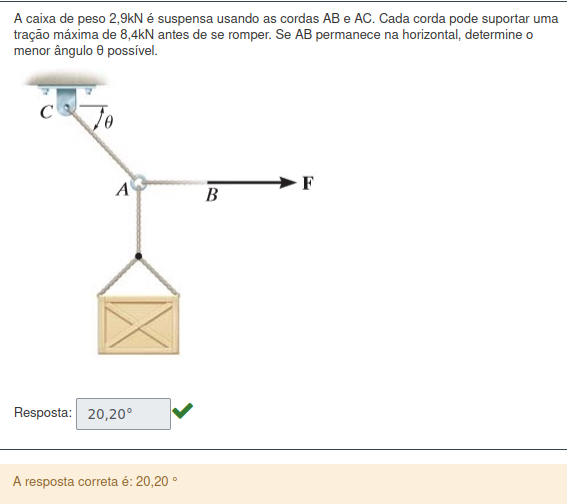

In [3]:
questao='1.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [4]:
%%write_and_run inputs/$questao
modP=2.9
modT=8.4

In [5]:
%%write_and_run resolutions/$questao
P=modP*vector(0,-1,0)
theta=sy.asin(modP/modT)
resposta(theta,'^{\circ}')

/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
P,(-2.9)*N.j
theta,0.352492466815250


A resposta final é:


20.196^{\circ}

<IPython.core.display.Math object>

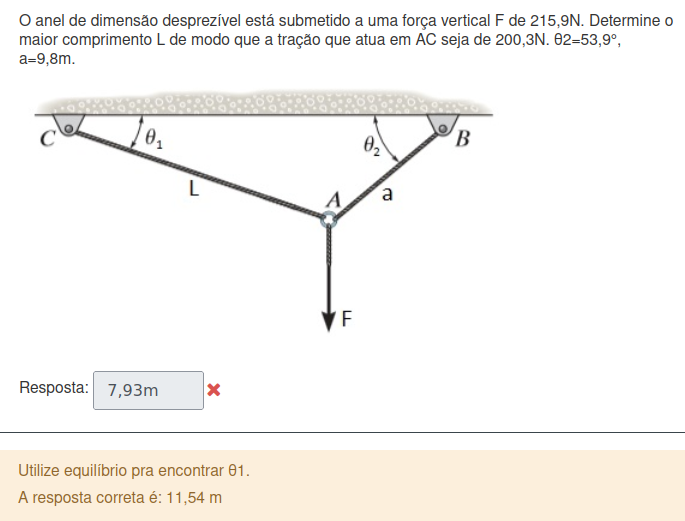

In [6]:
questao='1.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [7]:
%%write_and_run inputs/$questao
modF=215.9
modFAC=200.3
theta2=np.radians(53.9)
a=9.8

In [8]:
theta1, modFAB=sy.symbols(r'\theta_1 |F_{AB}|',real=True, positive=True)
F=modF*vector(0,-1,0)
FAC=modFAC*vector(-sy.cos(theta1),sy.sin(theta1),0)
FAB=modFAB*vector(sy.cos(theta2),sy.sin(theta2),0)
eq=F+FAC+FAB
eq1=eq.dot(i)
eq2=eq.dot(j)
theta1val, modFABval=sy.solve([eq1,eq2],(theta1,modFAB))[0]
theta1deg=np.rad2deg(float(theta1val))
h=a*sy.sin(theta2)
L=h/sy.sin(theta1val)
resposta(L,'m')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F,(-215.9)*N.j
FAC,(-200.3*cos(\theta_1))*N.i + (200.3*sin(\theta...
FAB,0.589196357353342*|F_{AB}|*N.i + 0.80798988389...
eq,(0.589196357353342*|F_{AB}| - 200.3*cos(\theta...
eq1,0.589196357353342*|F_{AB}| - 200.3*cos(\theta_1)
eq2,0.807989883898031*|F_{AB}| + 200.3*sin(\theta_...
theta1deg,86.67
h,7.91830086220070
L,7.93166324497288


A resposta final é:


7.932m

<IPython.core.display.Math object>

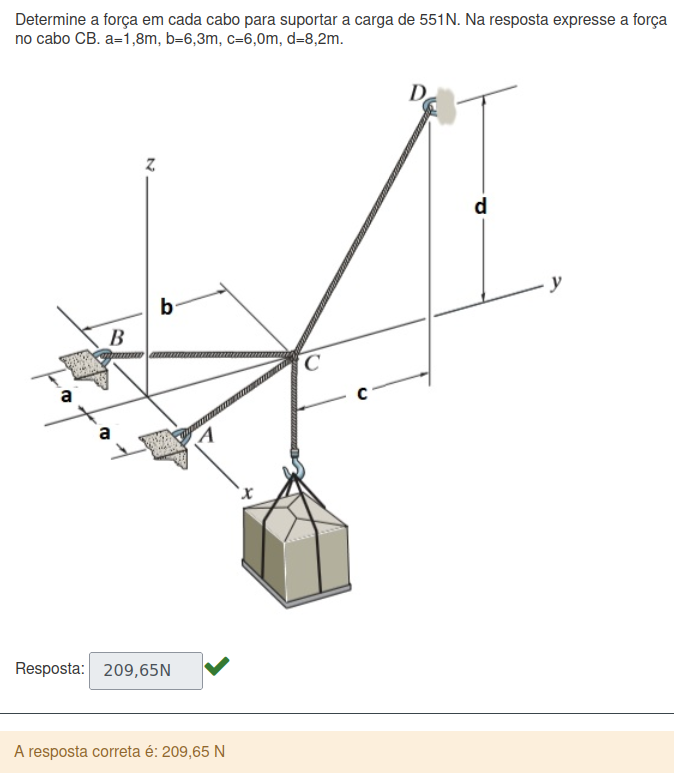

In [9]:
questao='1.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [10]:
%%write_and_run inputs/$questao
a=1.8
b=6.3
c=6.0
d=8.2
modP=551

In [11]:
%%write_and_run resolutions/$questao
modFCD=modP/d*(c**2+d**2)**0.5
modFCB=modP*c*((a**2+b**2)**0.5)/2/b/d
modFCA=modFCB
P=modP*vector(0,0,-1)
FCD=modFCD*vector(0,c/(c**2+d**2)**0.5,d/(c**2+d**2)**0.5)
FCB=modFCB*vector(-a/(a**2+b**2)**0.5,-b/(a**2+b**2)**0.5,0)
FCA=modFCB*vector(+a/(a**2+b**2)**0.5,-b/(a**2+b**2)**0.5,0)
resposta(modFCB,'N')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
modFCD,682.75
modFCB,209.65
modFCA,209.65
P,(-551)*N.k
FCD,403.170731707317*N.j + 551.0*N.k
FCB,(-57.595818815331)*N.i + (-201.585365853659)*N.j
FCA,57.595818815331*N.i + (-201.585365853659)*N.j


A resposta final é:


209.652N

<IPython.core.display.Math object>

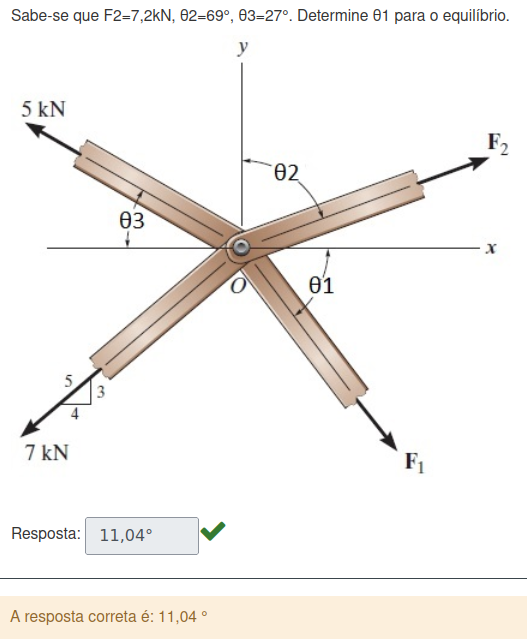

In [12]:
questao='1.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [13]:
%%write_and_run inputs/$questao
modF2=7.2
theta2deg=(69)
theta3deg=(27)

In [14]:
%%write_and_run resolutions/$questao
theta2=np.radians(theta2deg)
theta3=np.radians(theta3deg)
modF3=5
modF4=7
theta1=sy.atan(-(modF2*sy.cos(theta2)+modF3*sy.sin(theta3)-3/5*modF4)/(modF2*sy.sin(theta2)-modF3*sy.cos(theta3)-modF4*4/5))
theta1deg=np.rad2deg(float(theta1))
resposta(theta1,'^{\circ}')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta2,1.2
theta3,0.47
modF3,5
modF4,7
theta1,0.192646078167604
theta1deg,11.04


A resposta final é:


11.038^{\circ}

<IPython.core.display.Math object>

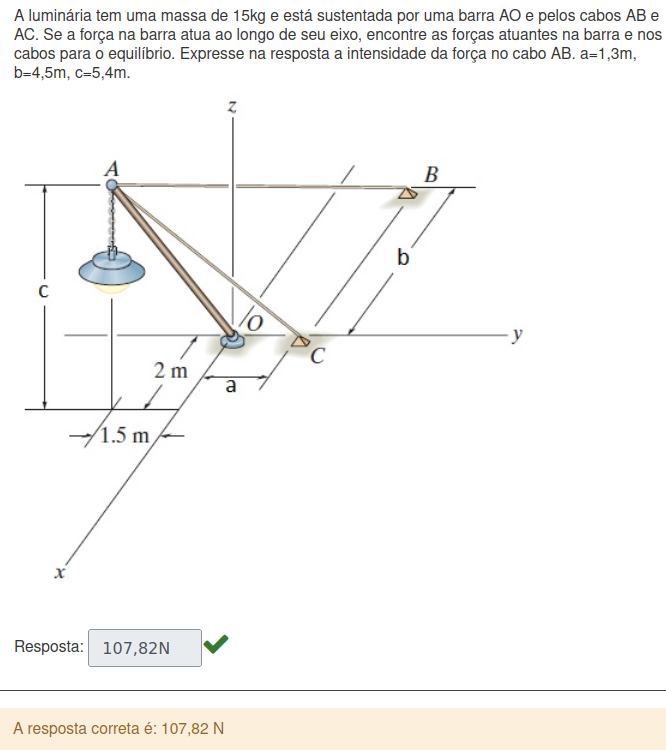

In [15]:
questao='1.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [16]:
%%write_and_run inputs/$questao
m=15
a=1.3
b=4.5
c=5.4

In [17]:
%%write_and_run resolutions/$questao
AO=(2**2+1.5**2+c**2)**0.5
cos_AO_x=2/AO
cos_AO_y=1.5/AO
cos_AO_z=c/AO

AC=(2**2+(1.5+a)**2+c**2)**0.5
cos_AC_x=2/AC
cos_AC_y=(1.5+a)/AC
cos_AC_z=c/AC

AB=((2+b)**2+(1.5+a)**2+c**2)**0.5
cos_AB_x=(b+2)/AB
cos_AB_y=(1.5+a)/AB
cos_AB_z=c/AB

g=9.81
modFAO,modFAC,modFAB=sy.symbols(r'|F_{AO}| |F_{AC}| |F_{AB}|')
P=m*g*vector(0,0,-1)
FAO=modFAO*vector(+cos_AO_x,-cos_AO_y,+cos_AO_z)
FAC=modFAC*vector(-cos_AC_x,+cos_AC_y,-cos_AC_z)
FAB=modFAB*vector(-cos_AB_x,+cos_AB_y,-cos_AB_z)
eq=P+FAO+FAC+FAB
eq1=eq.dot(i)
eq2=eq.dot(j)
eq3=eq.dot(k)

result=sy.solve([eq1,eq2,eq3],[modFAO,modFAC,modFAB])
modFAO=result[modFAO]
modFAB=result[modFAB]
modFAC=result[modFAC]
resposta(modFAB,'N')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
AO,5.95
cos_AO_x,0.34
cos_AO_y,0.25
cos_AO_z,0.91
AC,6.4
cos_AC_x,0.31
cos_AC_y,0.44
cos_AC_z,0.84
AB,8.9
cos_AB_x,0.73


A resposta final é:


107.816N

<IPython.core.display.Math object>

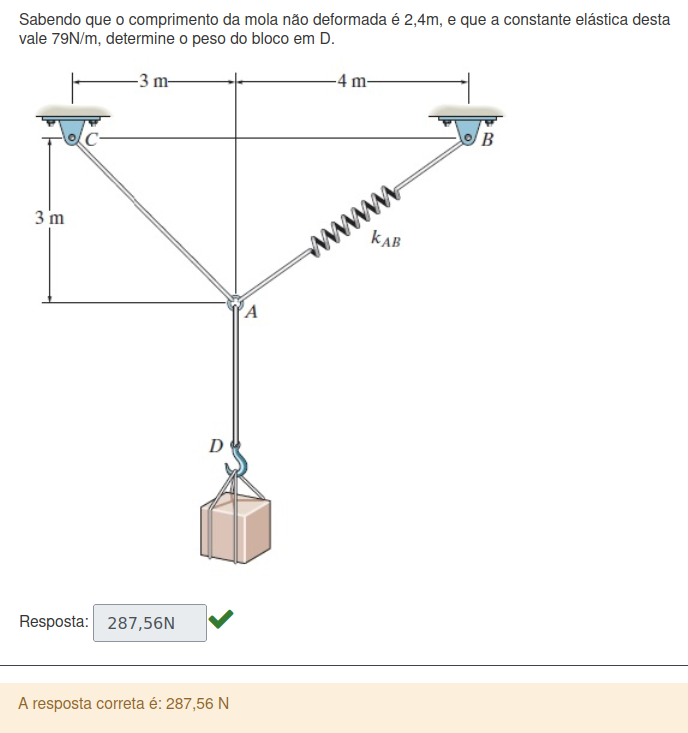

In [18]:
questao='1.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [19]:
%%write_and_run inputs/$questao
L0=2.4
kab=79

In [20]:
%%write_and_run resolutions/$questao
L=5
modFAB=(L-L0)*kab
modFAC=(2/(2)**0.5)*(L-L0)*kab*4/5
modP=modFAB*3/5+modFAC*(2**0.5)/2
resposta(modP,'N')

/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
L,5.00
modFAB,205.40
modFAC,232.38
modP,287.56


A resposta final é:


287.560N

<IPython.core.display.Math object>

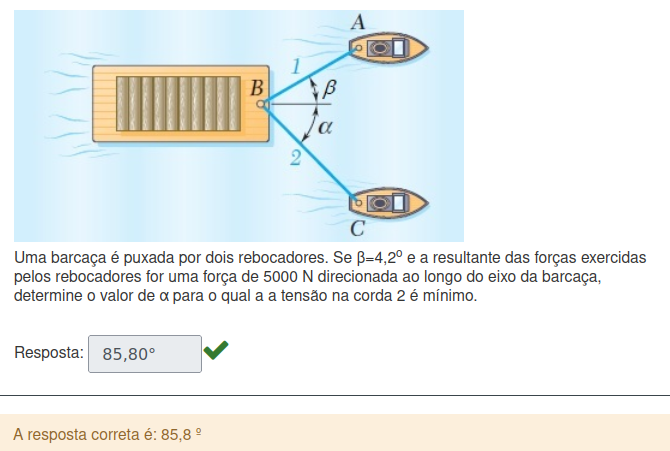

In [21]:
questao='1.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [22]:
%%write_and_run inputs/$questao
beta=4.2

In [23]:
%%write_and_run resolutions/$questao
alpha=90-beta
alpha=np.radians(alpha)
resposta(alpha,'^{\circ}')

/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,1.5


A resposta final é:


85.800^{\circ}

<IPython.core.display.Math object>

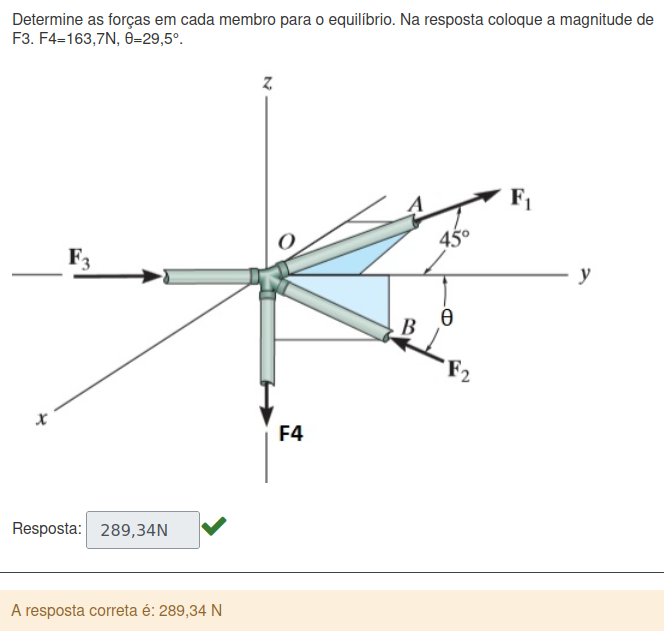

In [24]:
questao='1.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [39]:
%%write_and_run inputs/$questao
modF4=163.7
thetad=29.5

In [40]:
%%write_and_run resolutions/$questao
theta=np.radians(thetad)
modF1=0
modF2=modF4/sy.sin(theta)
modF3=modF2*sy.cos(theta)
resposta(modF3,'N')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,0.51
modF1,0
modF2,332.437383714142
modF3,289.338770458961


A resposta final é:


289.339N

<IPython.core.display.Math object>

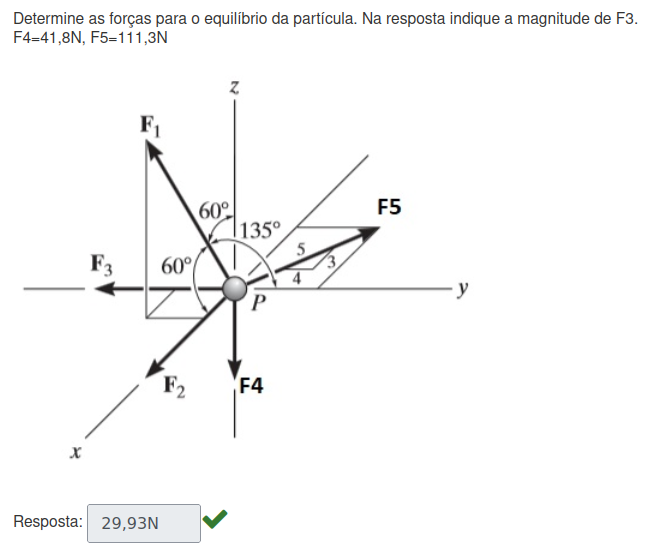

In [27]:
questao='1.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [28]:
%%write_and_run inputs/$questao
modF4=41.8
modF5=111.3

In [29]:
%%write_and_run resolutions/$questao
modF1=modF4*2
modF3=-2*modF4*((2**0.5)/2)+4/5*modF5
modF2=3/5*modF5-modF1/2
resposta(modF3,'N')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
modF1,83.60
modF3,29.93
modF2,24.98


A resposta final é:


29.926N

<IPython.core.display.Math object>

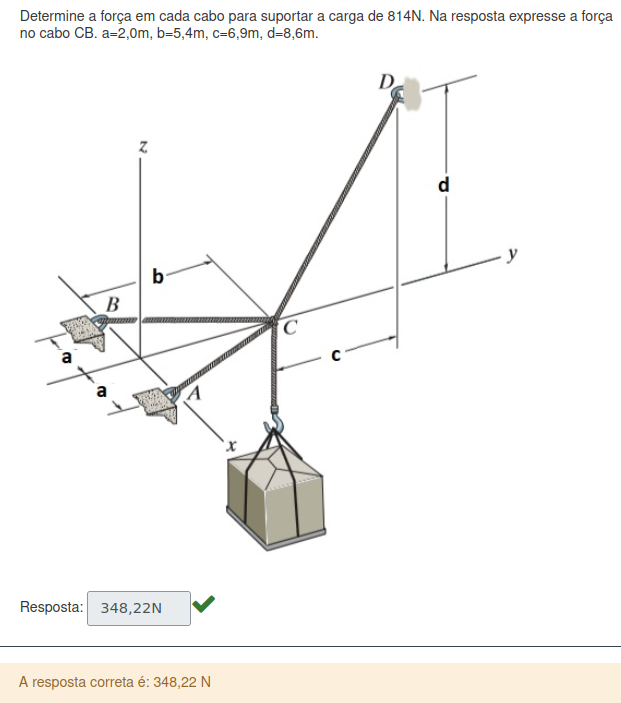

In [31]:
questao='2.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [34]:
%%write_and_run inputs/$questao
a=2.0
b=5.4
c=6.9
d=8.6
modP=814

In [35]:
%%write_and_run resolutions/$questao
modFCD=modP/d*(c**2+d**2)**0.5
modFCB=modP*c*((a**2+b**2)**0.5)/2/b/d
modFCA=modFCB
P=modP*vector(0,0,-1)
FCD=modFCD*vector(0,c/(c**2+d**2)**0.5,d/(c**2+d**2)**0.5)
FCB=modFCB*vector(-a/(a**2+b**2)**0.5,-b/(a**2+b**2)**0.5,0)
FCA=modFCB*vector(+a/(a**2+b**2)**0.5,-b/(a**2+b**2)**0.5,0)
resposta(modFCB,'N')

/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
modFCD,1043.61
modFCB,348.22
modFCA,348.22
P,(-814)*N.k
FCD,653.093023255814*N.j + 814.0*N.k
FCB,(-120.94315245478)*N.i + (-326.546511627907)*N.j
FCA,120.94315245478*N.i + (-326.546511627907)*N.j


A resposta final é:


348.224N

<IPython.core.display.Math object>

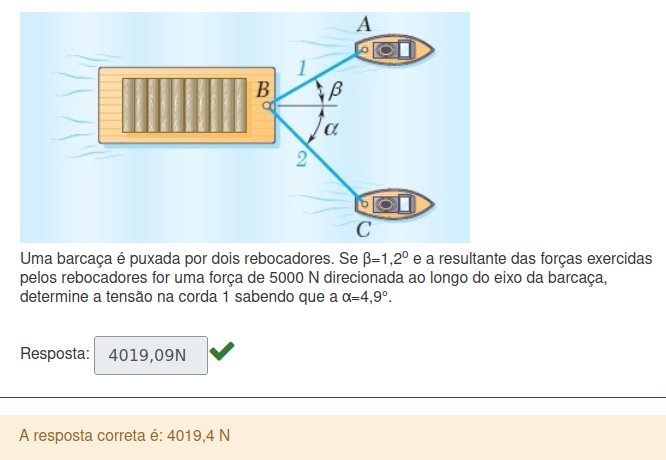

In [ ]:
questao='2.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [ ]:
%%write_and_run inputs/$questao
F=5000
betad=1.2
alphad=4.9

In [ ]:
%%write_and_run resolutions/$questao
alpha=np.radians(alphad)
beta=np.radians(betad)
T1=F/(sy.cos(beta)+sy.sin(beta)/sy.tan(alpha))
resposta(T1,'N')

/tmp/ipykernel_10975/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,0.09
beta,0.02
T1,4019.08764003109


A resposta final é:


4019.088N

<IPython.core.display.Math object>

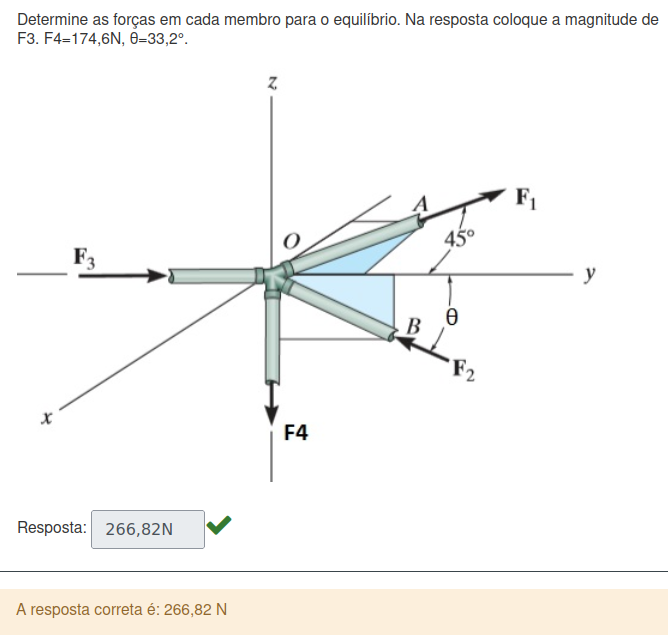

In [36]:
questao='2.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [41]:
%%write_and_run inputs/$questao
modF4=174.6
thetad=33.2

In [42]:
%%write_and_run resolutions/$questao
theta=np.radians(thetad)
modF1=0
modF2=modF4/sy.sin(theta)
modF3=modF2*sy.cos(theta)
resposta(modF3,'N')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta,0.58
modF1,0
modF2,318.867287847310
modF3,266.816767200075


A resposta final é:


266.817N

<IPython.core.display.Math object>

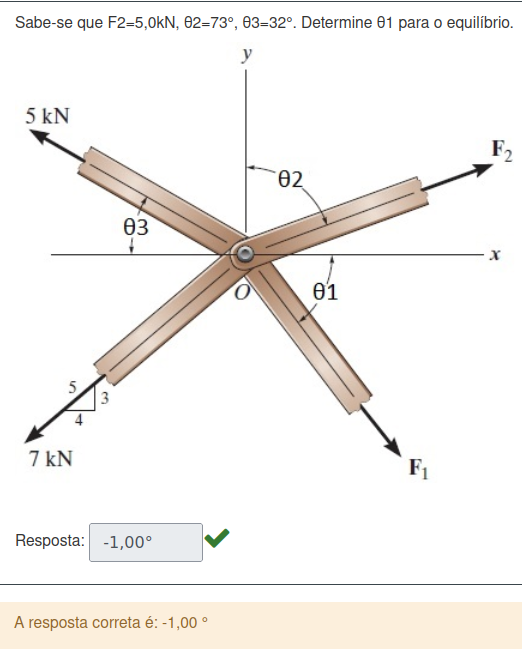

In [44]:
questao='2.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [45]:
%%write_and_run inputs/$questao
modF2=5.0
theta2deg=73
theta3deg=32

In [46]:
%%write_and_run resolutions/$questao
theta2=np.radians(theta2deg)
theta3=np.radians(theta3deg)
modF3=5
modF4=7
theta1=sy.atan(-(modF2*sy.cos(theta2)+modF3*sy.sin(theta3)-3/5*modF4)/(modF2*sy.sin(theta2)-modF3*sy.cos(theta3)-modF4*4/5))
theta1deg=np.rad2deg(float(theta1))
resposta(theta1,'^{\circ}')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta2,1.27
theta3,0.56
modF3,5
modF4,7
theta1,-0.0175016945075407
theta1deg,-1.0


A resposta final é:


-1.003^{\circ}

<IPython.core.display.Math object>

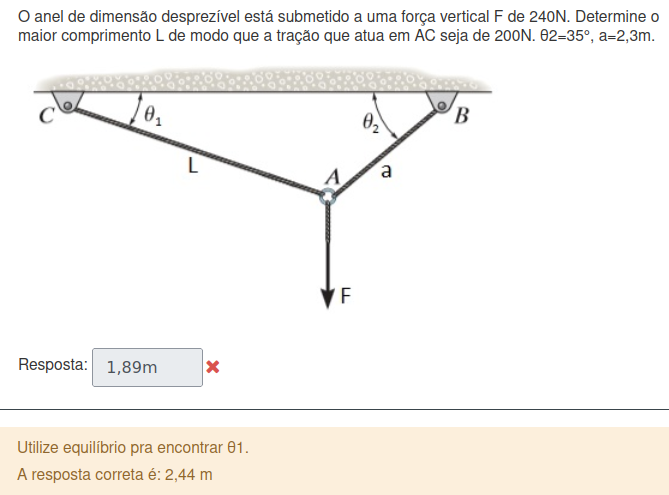

In [47]:
questao='2.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [48]:
%%write_and_run inputs/$questao
modF=240.0
modFAC=200
theta2d=35
a=2.3

In [49]:
theta2=np.radians(theta2d)
theta1, modFAB=sy.symbols(r'\theta_1 |F_{AB}|',real=True, positive=True)
F=modF*vector(0,-1,0)
FAC=modFAC*vector(-sy.cos(theta1),sy.sin(theta1),0)
FAB=modFAB*vector(sy.cos(theta2),sy.sin(theta2),0)
eq=F+FAC+FAB
eq1=eq.dot(i)
eq2=eq.dot(j)
theta1val, modFABval=sy.solve([eq1,eq2],(theta1,modFAB))[0]
theta1deg=np.rad2deg(float(theta1val))
h=a*sy.sin(theta2)
L=h/sy.sin(theta1val)
resposta(L,'m')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
theta2,0.61
F,(-240.0)*N.j
FAC,(-200*cos(\theta_1))*N.i + (200*sin(\theta_1))...
FAB,0.819152044288992*|F_{AB}|*N.i + 0.57357643635...
eq,(0.819152044288992*|F_{AB}| - 200*cos(\theta_1...
eq1,0.819152044288992*|F_{AB}| - 200*cos(\theta_1)
eq2,0.573576436351046*|F_{AB}| + 200*sin(\theta_1)...
theta1deg,44.41
h,1.31922580360741
L,1.88502192863785


A resposta final é:


1.885m

<IPython.core.display.Math object>

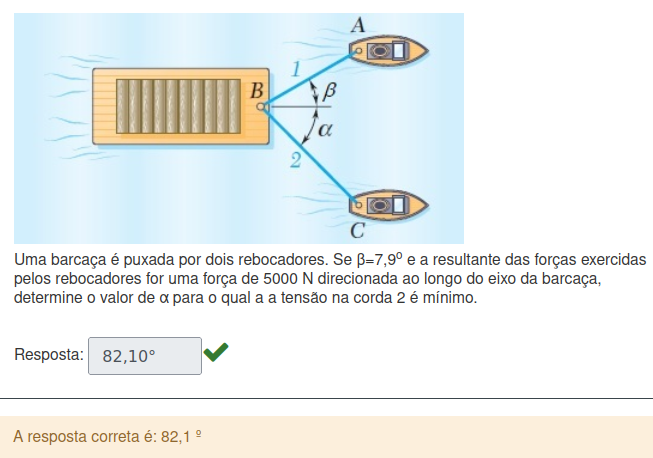

In [50]:
questao='2.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [51]:
%%write_and_run inputs/$questao
beta=7.9

In [52]:
%%write_and_run resolutions/$questao
alpha=90-beta
alpha=np.radians(alpha)
resposta(alpha,'^{\circ}')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,1.43


A resposta final é:


82.100^{\circ}

<IPython.core.display.Math object>

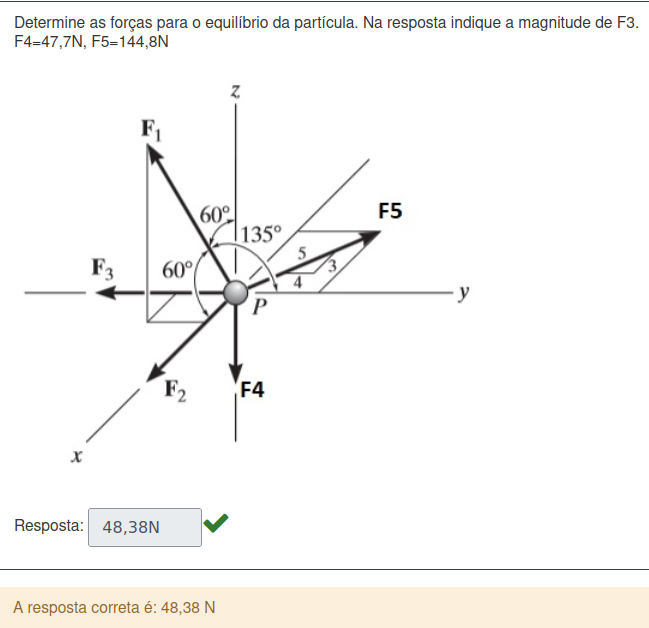

In [53]:
questao='2.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [54]:
%%write_and_run inputs/$questao
modF4=47.7
modF5=144.8


In [55]:
%%write_and_run resolutions/$questao
modF1=modF4*2
modF3=-2*modF4*((2**0.5)/2)+4/5*modF5
modF2=3/5*modF5-modF1/2
resposta(modF3,'N')

/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
modF1,95.40
modF3,48.38
modF2,39.18


A resposta final é:


48.382N

<IPython.core.display.Math object>

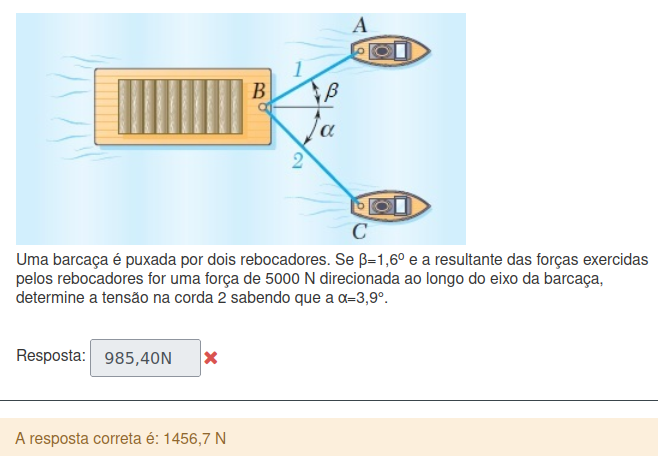

In [56]:
questao='2.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [57]:
%%write_and_run inputs/$questao
F=5000
betad=1.6
alphad=3.9

In [58]:
%%write_and_run resolutions/$questao
alpha=np.radians(alphad)
beta=np.radians(betad)
modT1=F/(sy.cos(beta)+sy.sin(beta)/sy.tan(alpha))
modT2=modT1*sy.sin(beta)/sy.sin(alpha)
resposta(modT2,'N')

/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
alpha,0.07
beta,0.03
modT1,3548.16404883965
modT2,1456.59238877994


A resposta final é:


1456.592N

<IPython.core.display.Math object>

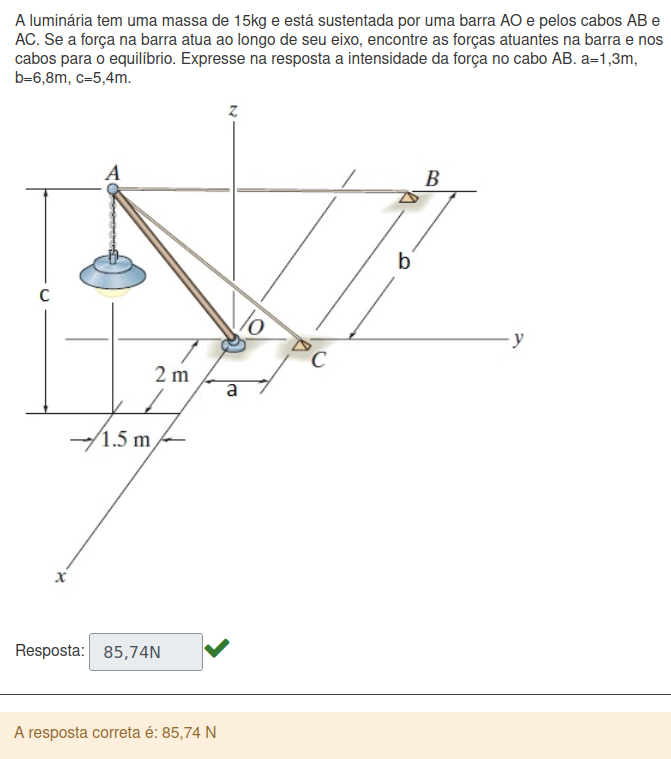

In [59]:
questao='2.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='images/'+questao+'.png') 

In [60]:
%%write_and_run inputs/$questao
m=15
a=1.3
b=6.8
c=5.4


In [61]:
%%write_and_run resolutions/$questao
AO=(2**2+1.5**2+c**2)**0.5
cos_AO_x=2/AO
cos_AO_y=1.5/AO
cos_AO_z=c/AO

AC=(2**2+(1.5+a)**2+c**2)**0.5
cos_AC_x=2/AC
cos_AC_y=(1.5+a)/AC
cos_AC_z=c/AC

AB=((2+b)**2+(1.5+a)**2+c**2)**0.5
cos_AB_x=(b+2)/AB
cos_AB_y=(1.5+a)/AB
cos_AB_z=c/AB

g=9.81
modFAO,modFAC,modFAB=sy.symbols(r'|F_{AO}| |F_{AC}| |F_{AB}|')
P=m*g*vector(0,0,-1)
FAO=modFAO*vector(+cos_AO_x,-cos_AO_y,+cos_AO_z)
FAC=modFAC*vector(-cos_AC_x,+cos_AC_y,-cos_AC_z)
FAB=modFAB*vector(-cos_AB_x,+cos_AB_y,-cos_AB_z)
eq=P+FAO+FAC+FAB
eq1=eq.dot(i)
eq2=eq.dot(j)
eq3=eq.dot(k)

result=sy.solve([eq1,eq2,eq3],[modFAO,modFAC,modFAB])
modFAO=result[modFAO]
modFAB=result[modFAB]
modFAC=result[modFAC]
resposta(modFAB,'N')


/tmp/ipykernel_5847/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
AO,5.95
cos_AO_x,0.34
cos_AO_y,0.25
cos_AO_z,0.91
AC,6.4
cos_AC_x,0.31
cos_AC_y,0.44
cos_AC_z,0.84
AB,10.7
cos_AB_x,0.82


A resposta final é:


85.739N